Data Preprocessing

Importing the libraries

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [41]:
dataset = pd.read_csv('./archive/IPL Matches 2008-2020.csv')
dataset.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [42]:
dataset['winner'].value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [43]:
dataset.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [44]:
x = dataset.iloc[:, :9].values
y = dataset.iloc[:,10:12].values
y

array([['Kolkata Knight Riders', 'runs'],
       ['Chennai Super Kings', 'runs'],
       ['Delhi Daredevils', 'wickets'],
       ...,
       ['Sunrisers Hyderabad', 'wickets'],
       ['Delhi Capitals', 'runs'],
       ['Mumbai Indians', 'wickets']], dtype=object)

Handling the missing data

In [45]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(x[:, :])
x[:, :] = imputer.transform(x[:, :])

In [46]:
#Checking for missing values
pd.DataFrame(x).isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [47]:
print(x)

[[335982 'Bangalore' '2008-04-18' ... 'Royal Challengers Bangalore'
  'Kolkata Knight Riders' 'Royal Challengers Bangalore']
 [335983 'Chandigarh' '2008-04-19' ... 'Kings XI Punjab'
  'Chennai Super Kings' 'Chennai Super Kings']
 [335984 'Delhi' '2008-04-19' ... 'Delhi Daredevils' 'Rajasthan Royals'
  'Rajasthan Royals']
 ...
 [1237178 'Abu Dhabi' '2020-11-06' ... 'Royal Challengers Bangalore'
  'Sunrisers Hyderabad' 'Sunrisers Hyderabad']
 [1237180 'Abu Dhabi' '2020-11-08' ... 'Delhi Capitals'
  'Sunrisers Hyderabad' 'Delhi Capitals']
 [1237181 'Dubai' '2020-11-10' ... 'Delhi Capitals' 'Mumbai Indians'
  'Delhi Capitals']]


Dividing the dataset into training and test set

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [49]:
print(X_train)

[[501262 'Mumbai' '2011-05-19' ... 'Pune Warriors'
  'Kolkata Knight Riders' 'Kolkata Knight Riders']
 [1136613 'Jaipur' '2018-05-19' ... 'Rajasthan Royals'
  'Royal Challengers Bangalore' 'Rajasthan Royals']
 [336023 'Jaipur' '2008-05-17' ... 'Rajasthan Royals'
  'Royal Challengers Bangalore' 'Royal Challengers Bangalore']
 ...
 [392197 'Port Elizabeth' '2009-04-27' ... 'Kolkata Knight Riders'
  'Mumbai Indians' 'Mumbai Indians']
 [501259 'Mumbai' '2011-05-16' ... 'Pune Warriors' 'Deccan Chargers'
  'Deccan Chargers']
 [336019 'Chandigarh' '2008-05-28' ... 'Kings XI Punjab'
  'Rajasthan Royals' 'Rajasthan Royals']]


In [50]:
print(X_test)

[[392206 'Johannesburg' '2009-05-02' ... 'Chennai Super Kings'
  'Delhi Daredevils' 'Delhi Daredevils']
 [1136608 'Indore' '2018-05-14' ... 'Kings XI Punjab'
  'Royal Challengers Bangalore' 'Royal Challengers Bangalore']
 [335990 'Hyderabad' '2008-04-24' ... 'Deccan Chargers'
  'Rajasthan Royals' 'Rajasthan Royals']
 ...
 [336017 'Kolkata' '2008-05-13' ... 'Kolkata Knight Riders'
  'Delhi Daredevils' 'Kolkata Knight Riders']
 [1136565 'Chennai' '2018-04-10' ... 'Chennai Super Kings'
  'Kolkata Knight Riders' 'Chennai Super Kings']
 [598039 'Hyderabad' '2013-05-01' ... 'Sunrisers Hyderabad'
  'Mumbai Indians' 'Mumbai Indians']]


In [51]:
print(y_train)

[['Kolkata Knight Riders' 'wickets']
 ['Rajasthan Royals' 'runs']
 ['Rajasthan Royals' 'runs']
 ...
 ['Mumbai Indians' 'runs']
 ['Deccan Chargers' 'wickets']
 ['Kings XI Punjab' 'runs']]


In [52]:
print(y_test)

[['Chennai Super Kings' 'runs']
 ['Royal Challengers Bangalore' 'wickets']
 ['Rajasthan Royals' 'wickets']
 [nan nan]
 ['Kings XI Punjab' 'runs']
 ['Deccan Chargers' 'wickets']
 ['Kings XI Punjab' 'wickets']
 ['Kings XI Punjab' 'wickets']
 ['Kings XI Punjab' 'runs']
 ['Sunrisers Hyderabad' 'runs']
 ['Sunrisers Hyderabad' 'runs']
 ['Gujarat Lions' 'runs']
 ['Chennai Super Kings' 'wickets']
 ['Delhi Capitals' 'runs']
 ['Mumbai Indians' 'wickets']
 ['Delhi Daredevils' 'wickets']
 ['Sunrisers Hyderabad' 'runs']
 ['Mumbai Indians' 'runs']
 ['Royal Challengers Bangalore' 'wickets']
 ['Royal Challengers Bangalore' 'runs']
 ['Chennai Super Kings' 'runs']
 ['Pune Warriors' 'runs']
 ['Mumbai Indians' 'runs']
 ['Kings XI Punjab' 'runs']
 ['Rajasthan Royals' 'wickets']
 ['Rajasthan Royals' 'wickets']
 ['Rajasthan Royals' 'wickets']
 ['Chennai Super Kings' 'wickets']
 ['Royal Challengers Bangalore' 'runs']
 ['Chennai Super Kings' 'wickets']
 ['Sunrisers Hyderabad' 'runs']
 ['Gujarat Lions' 'wickets

Assigning unique numbers to the categorical data

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train[:, 3] = le.fit_transform(X_train[:, 3])
X_train[:, 4] = le.fit_transform(X_train[:, 4])
X_train[:, 5] = le.fit_transform(X_train[:, 5])
X_train[:, 6] = le.fit_transform(X_train[:, 6])
X_train[:, 7] = le.fit_transform(X_train[:, 7])
X_train[:, 8] = le.fit_transform(X_train[:, 8])

In [54]:
print(X_train)

[[501262 'Mumbai' '2011-05-19' ... 9 7 7]
 [1136613 'Jaipur' '2018-05-19' ... 10 13 10]
 [336023 'Jaipur' '2008-05-17' ... 10 13 13]
 ...
 [392197 'Port Elizabeth' '2009-04-27' ... 7 8 8]
 [501259 'Mumbai' '2011-05-16' ... 9 1 1]
 [336019 'Chandigarh' '2008-05-28' ... 5 10 10]]


Plotting graphs to visualize the data between
1)toss winner and match winner
2)Venue and match winner
3)Toss decision and match winner

<AxesSubplot:xlabel='toss_winner', ylabel='count'>

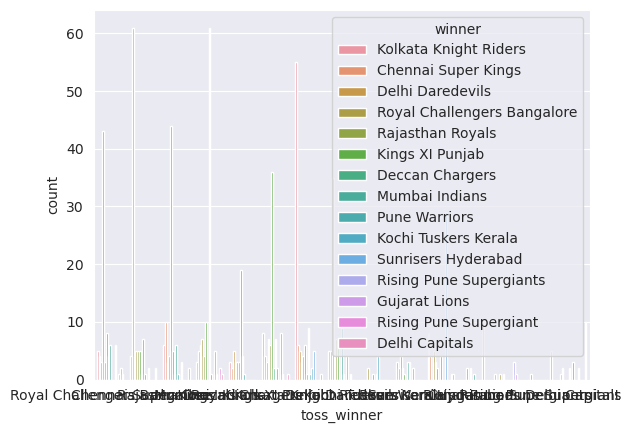

In [55]:
import seaborn as sns
sns.countplot(x='toss_winner',hue='winner',data=dataset)

In [56]:
match_winner = dataset['winner']

In [57]:
toss_winner = dataset['toss_winner']

In [58]:
#Replacing the team names with numbers
toss_winner = toss_winner.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Chennai Super Kings','Kings XI Punjab','Rajasthan Royals','Delhi Daredevils','Sunrisers Hyderabad','Deccan Chargers','Gujarat Lions','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiants','Delhi Capitals'],['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])

In [59]:
#Converting the data into integer
toss_winner = toss_winner.astype(int)

In [60]:
match_winner = match_winner.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Chennai Super Kings','Kings XI Punjab','Rajasthan Royals','Delhi Daredevils','Sunrisers Hyderabad','Deccan Chargers','Gujarat Lions','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiants','Delhi Capitals'],['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])

In [61]:
#Replacing nan values with 0
match_winner = match_winner.replace(np.nan,0)




In [62]:
#Converting the data into integer
match_winner = match_winner.astype(int)

In [63]:
#Reshaping the data
toss_winner = toss_winner.values.reshape(-1,1)
match_winner = match_winner.values.reshape(-1,1)

Support Vector Regression To Predict The Winner Of The Match based on the toss winner

In [64]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(toss_winner,match_winner )



/home/harsh/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [65]:
regressor.score(toss_winner,match_winner)

0.014830862490837982

In [66]:
regressor.predict([[1]])

array([1.20994611])

Trying different models to predict the winner of the match based on the toss winner

In [67]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(toss_winner,match_winner)

LinearRegression()

In [68]:
regressor.score(toss_winner,match_winner)

0.17718905413197417

In [69]:
regressor.predict([[1]])

array([[3.20244297]])

In [70]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(toss_winner,match_winner)

DecisionTreeRegressor(random_state=0)

In [71]:
regressor.score(toss_winner,match_winner)

0.20463878817917924

In [72]:
regressor.predict([[1]])

array([3.09433962])

In [73]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(toss_winner,match_winner)

/tmp/ipykernel_6055/2864916114.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(toss_winner,match_winner)


RandomForestRegressor(n_estimators=10, random_state=0)

In [74]:
regressor.score(toss_winner,match_winner)

0.2032806602813919

In [75]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors = 5, metric = 'minkowski', p = 2)
regressor.fit(toss_winner,match_winner)

KNeighborsRegressor()

In [76]:
regressor.score(toss_winner,match_winner)

0.1169411251698318